In [27]:
import numpy as np                              # import numpy
from numpy.linalg import inv                    # for matrix inverse
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework
from scipy.stats import multivariate_normal     

In [28]:
#Generating our data

m1 = [1,1]      # consider a random mean and covariance value
m2 = [7,7]   
                                           
cov1 = [[3, 2], [2, 3]]                                      
cov2 = [[2, -1], [-1, 2]]

x = np.random.multivariate_normal(m1, cov1, size=(200,))  # Generating 200 samples for each mean and covariance
y = np.random.multivariate_normal(m2, cov2, size=(200,))
d = np.concatenate((x, y), axis=0)

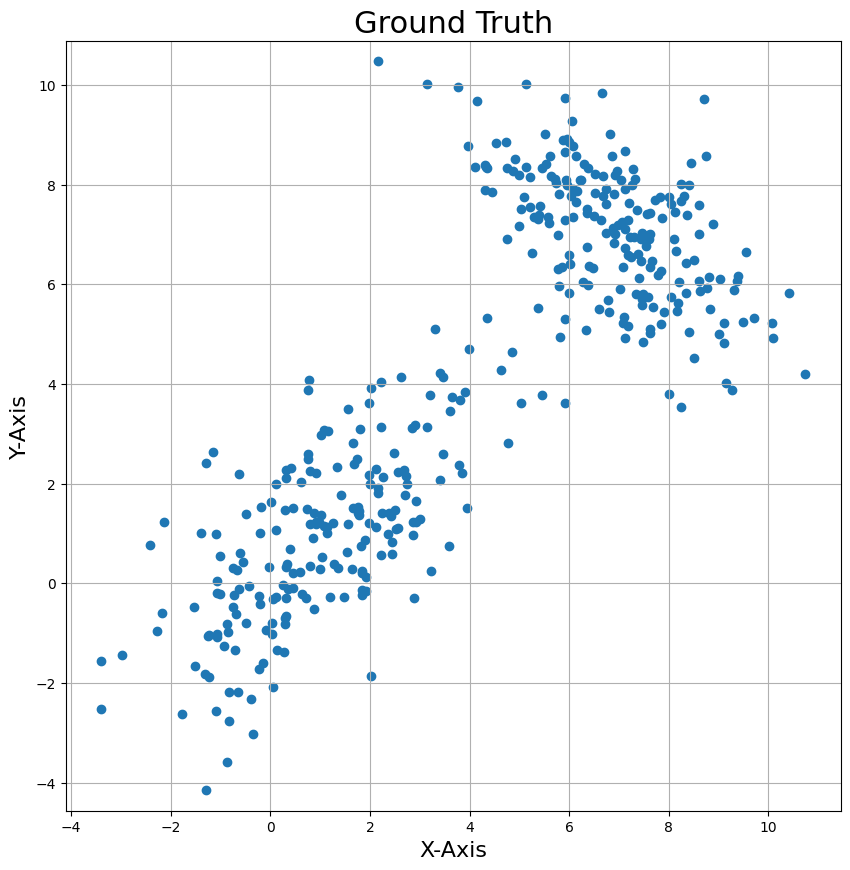

In [29]:
#Plotting the ground truth

plt.figure(figsize=(10,10))                                 
plt.scatter(d[:,0], d[:,1], marker='o')     
plt.axis('equal')                                  
plt.xlabel('X-Axis', fontsize=16)              
plt.ylabel('Y-Axis', fontsize=16)                     
plt.title('Ground Truth', fontsize=22)    
plt.grid()            
plt.show()

In [30]:
#Taking initial guesses for the parameters

m1 = [np.random.choice(d[:,0]), np.random.choice(d[:,1])]  # taking random values for mean
m2 = [np.random.choice(d[:,0]), np.random.choice(d[:,1])]
cov1 = np.cov(np.transpose(d))
cov2 = np.cov(np.transpose(d))
pi = 0.5

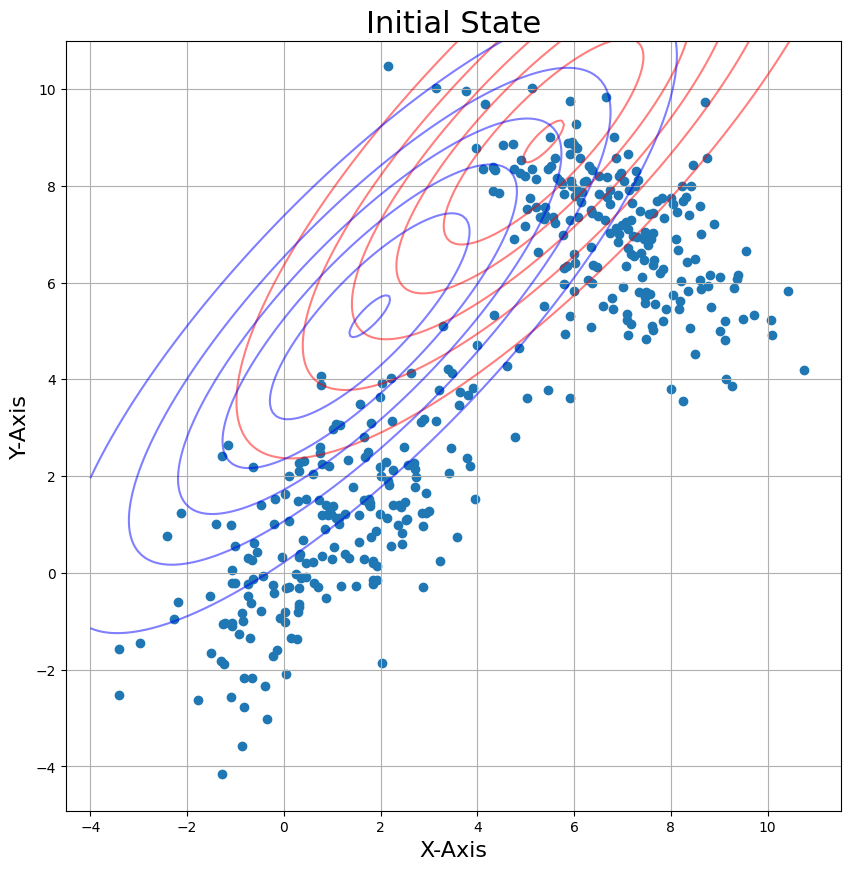

In [31]:
#Plotting Initial State

x1 = np.linspace(-4,11,200)  
x2 = np.linspace(-4,11,200)
X, Y = np.meshgrid(x1,x2) 


# pos  = np.dstack((X, Y))
# mu  = [0, 1]
# cov = [[1, 0.8], [0.8, 1]]
# rv   = multivariate_normal( mu, cov)
# Z    = rv.pdf(pos)

pos = np.dstack((X, Y))               # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   


Z1 = multivariate_normal(m1, cov1)  
Z2 = multivariate_normal(m2, cov2)
Z1 = Z1.pdf(pos)
Z2 = Z2.pdf(pos)

plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
plt.scatter(d[:,0], d[:,1], marker='o')     

plt.contour(X, Y, Z1, colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2, colors="b" ,alpha = 0.5) 
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Initial State', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()


In [41]:

##Expectation step
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]

    print('shape d', d.shape)
    print('shape m1', np.shape(m1))
    print('shape cov1', np.shape(cov1))
    print('shape m2', np.shape(m2))
    print('shape cov2', np.shape(cov2))
    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    print("len eval1", len(eval1))
    return(eval1)

In [51]:
## Maximization step
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(d)):
        print ('eval1[i]', eval1[i])
        print ('d[i]', d[i])
        num_mu1 += (1-eval1[i]) * d[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * d[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2
    print ('num_mu1', num_mu1)
    print ('din_mu1', din_mu1)
    print ('len d' , len(d))

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(d)):

        q1 = np.matrix(d[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(d[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(d)

    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

In [34]:
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    s1=lis1[2]
    s2=lis1[3]


    pos = np.dstack((X, Y))               # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y   


    Z1 = multivariate_normal(mu1, s1)  
    Z2 = multivariate_normal(mu2, s2)
    Z1 = Z1.pdf(pos)
    Z2 = Z2.pdf(pos)

    plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
    plt.scatter(d[:,0], d[:,1], marker='o')     

    plt.contour(X, Y, Z1, colors="r" ,alpha = 0.5) 
    plt.contour(X, Y, Z2, colors="b" ,alpha = 0.5) 
    plt.axis('equal')                                                                  # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
    plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
    plt.title('Initial State', fontsize=22)                                            # Title of the plot
    plt.grid()                                                                         # displaying gridlines
    plt.show()


In [52]:

#Calling the functions and repeating until it converges

iterations = 1
lis1=[m1,m2,cov1,cov2,pi]
for i in range(0,iterations):
    out  = Estep(lis1)
    print ('out', np.shape(out))
    lis2 = Mstep(out)
    print('lis2', np.shape(lis2))
    lis1=lis2
    # if(i==0 or i == 4 or i == 9 or i == 14 or i == 19):
    #     plot(lis1)







shape d (400, 2)
shape m1 (2,)
shape cov1 (2, 2)
shape m2 (2,)
shape cov2 (2, 2)
len eval1 400
out (400,)
eval1[i] 0.8181765229602531
d[i] [1.00271303 0.27866498]
eval1[i] 0.7429970269887454
d[i] [1.68664321 2.38557851]
eval1[i] 0.7560434727840624
d[i] [2.36498594 0.9931497 ]
eval1[i] 0.8887702413672638
d[i] [-0.70539713 -1.3473667 ]
eval1[i] 0.3969424919529668
d[i] [7.08477034 5.23080034]
eval1[i] 0.7305739695362605
d[i] [2.86050454 1.23879158]
eval1[i] 0.7964192381272932
d[i] [1.07190762 1.14407564]
eval1[i] 0.8077798823047666
d[i] [1.27196463 0.38346386]
eval1[i] 0.8709136326429435
d[i] [ 0.14348705 -1.33513705]
eval1[i] 0.8343410843756889
d[i] [ 2.01930509 -1.8663624 ]
eval1[i] 0.7999707907052617
d[i] [ 1.91674154 -0.14817212]
eval1[i] 0.729990126365006
d[i] [0.77706177 4.07342934]
eval1[i] 0.7750456018578776
d[i] [0.92573014 2.21177099]
eval1[i] 0.7471785118397276
d[i] [2.53018102 1.0953062 ]
eval1[i] 0.6639201748461961
d[i] [3.46519505 2.59158003]
eval1[i] 0.8848378445177684
d[i]